**Following are components of LangGraph**
- **1. Nodes:** - python function
- **2. Edges:** - Routing Logic
- **3. States:** - shared data structures that evolves over time 

In [3]:
!pip install langgraph

In [1]:
from typing import TypedDict

class SomeState(TypedDict):
    attribute1:str
    attribute2:str

In [2]:
def some_function(state: SomeState):
    state['attribute1']= 'Value changed by node some_function()'

    return state

In [4]:
from langgraph.graph import StateGraph

In [6]:
graph = StateGraph(SomeState)
graph.add_node('node1', some_function)

In [7]:
from langgraph.graph.state import END

graph.add_edge('node1', END)

In [8]:
graph.set_entry_point('node1')

In [9]:
compiled_graph = graph.compile()

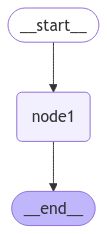

In [10]:
from IPython.display import Image

Image(compiled_graph.get_graph().draw_mermaid_png())

In [11]:
type(compiled_graph)

langgraph.graph.state.CompiledStateGraph

In [12]:
compiled_graph.invoke({
    "input":"",
    "attribute1":"Initial value1",
    "attribute2":"Initial value2",
})

{'attribute1': 'Value changed by node some_function()',
 'attribute2': 'Initial value2'}